In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker
import h5py
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

<ipython-input-4-3030ac777b9d>:8: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [107]:
zundel_stw_e  = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/neo_scf_data_processing/Data/zundel_stw_ccpvtz_pb5d/energy.dat", dtype=None)
zundel_stw_pp  = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/neo_scf_data_processing/Data/zundel_stw_ccpvtz_pb5d/rmsdpp.dat", dtype=None)
zundel_stw_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/neo_scf_data_processing/Data/zundel_stw_ccpvtz_pb5d/rmsdpe.dat", dtype=None)

In [108]:
zundel_smt_e  = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/neo_scf_data_processing/Data/zundel_smt_ccpvtz_pb5d/energy.dat", dtype=None)
zundel_smt_pp  = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/neo_scf_data_processing/Data/zundel_smt_ccpvtz_pb5d/rmsdpp.dat", dtype=None)
zundel_smt_pe  = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/neo_scf_data_processing/Data/zundel_smt_ccpvtz_pb5d/rmsdpe.dat", dtype=None)

In [109]:
zundel_stw_iter = np.arange(1,zundel_stw_e.size,1)
zundel_smt_iter = np.arange(1,zundel_smt_e.size,1)

In [110]:
# Subtract the final energy for energy at each iteration
zundel_stw_e -= zundel_stw_e[-1]
zundel_smt_e -= zundel_smt_e[-1]

In [165]:
e_exp = [0,2,4,6,8,10]
e_yticks = [10**(-x) for x in e_exp]

pe_exp = [0,2,4,6,8]
pe_yticks = [10**(-x) for x in pe_exp]
pe_ylabels = [str(i) for i in pe_yticks]
 
pp_exp = [0,2,4,6,8]
pp_yticks = [10**(-x) for x in pp_exp]

In [166]:
pe_ylabels[0] = ' '

In [167]:
pe_ylabels

[' ', '0.01', '0.0001', '1e-06', '1e-08']

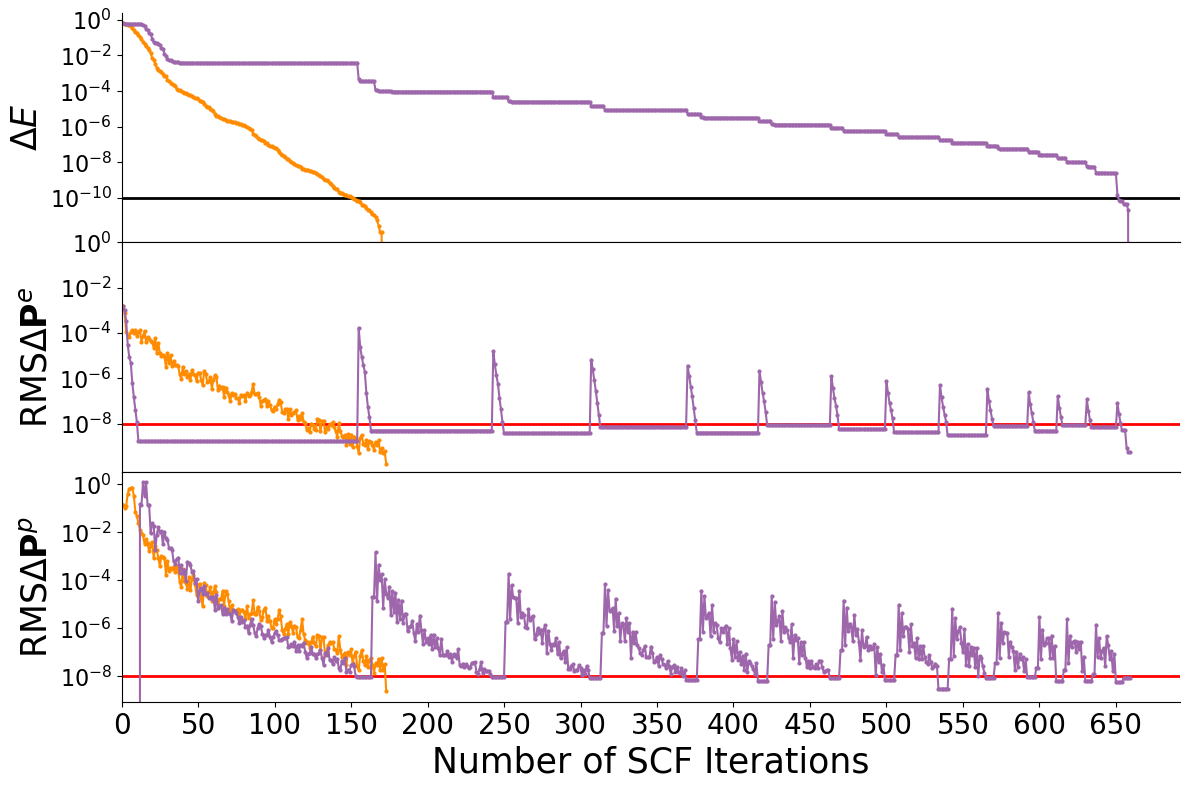

In [168]:
plt.style.use('default')
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3, hspace=0)
ax = gs.subplots(sharex=True)
#fig.suptitle('NEO-SCF with Different Algorithms, hatz/pb4d, $4H_2O+$ zundel Isomer')
ax[0].plot(zundel_smt_iter,zundel_smt_e[1:],'o-',c='darkorange',ms=2,label="Simultaneous-DIIS")
ax[0].plot(zundel_stw_iter,zundel_stw_e[1:],'o-',c='#9e66ab',ms=2,label="Stepwise-DIIS")
ax[0].axhline(y=10**(-10),xmin=0,xmax=zundel_stw_iter.size+1,c="black",linewidth=2,zorder=0,label='$E$ Threshold')
ax[0].set_yscale("log")
ax[0].set_yticks(ticks = e_yticks)
ax[0].set_ylabel("$ \Delta E}$",fontsize=25)
#ax[0].set_yticks([10**(-10),0])
#ax[0].legend(loc='upper right')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(zundel_smt_iter,zundel_smt_pe[1:],'o-',c='darkorange',ms=2)
ax[1].plot(zundel_stw_iter,zundel_stw_pe[1:],'o-',c='#9e66ab',ms=2)
ax[1].axhline(y=10**(-8),xmin=0,xmax=zundel_stw_iter.size+1,c="red",linewidth=2,zorder=0,label='RMS$ \Delta \mathbf{ \mathrm{P} } ^p$ Threshold')
ax[1].set_yscale("log")
ax[1].set_yticks(pe_yticks)
ax[1].set_ylabel("RMS$ \Delta \mathbf{P} ^e$",fontsize=25)
#ax[1].legend(loc='upper right')
ax[1].spines['right'].set_visible(False)

ax[2].plot(zundel_smt_iter,zundel_smt_pp[1:],'o-',c='darkorange',ms=2)
ax[2].plot(zundel_stw_iter,zundel_stw_pp[1:],'o-',c='#9e66ab',ms=2)
ax[2].axhline(y=10**(-8),xmin=0,xmax=zundel_stw_iter.size+1,c="red",linewidth=2,zorder=0)
ax[2].set_yscale("log")
ax[2].set_yticks(ticks = pp_yticks)
ax[2].set_ylabel("RMS$ \Delta \mathbf{P} ^p$",fontsize=25)
#ax[2].legend(loc='upper right')
ax[2].set_xlabel("Number of SCF Iterations", fontsize=25)
ax[2].set_xticks(np.arange(0, zundel_stw_iter.size+1, step=50))
ax[2].set_xticklabels(ax[2].get_xticks(), rotation=0, size=20)
ax[2].set_xlim(xmin=0)
ax[2].spines['right'].set_visible(False)

ax[0].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[2].tick_params(axis='y', labelsize=16)
# # Hide x labels and tick labels for all but bottom plot.
# for axes in ax:
#    axes.label_outer()

fig.set_facecolor('w')
lines_labels = [axes.get_legend_handles_labels() for axes in ax]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
#fig.legend(lines, labels,fontsize=20,loc='upper right')

plt.tight_layout()


plt.savefig('/Users/aodongliu/LiGroup/gaussian/remake_figures_new/new_figure2.pdf', dpi=3600)
# plt.show()



#bbox  = legend.get_window_extent().transformed(fig2.dpi_scale_trans.inverted())
#fig2.savefig(filename, dpi="figure", bbox_inches=bbox, facecolor="w")
        #legend.remove() # removes legend from showing on plot

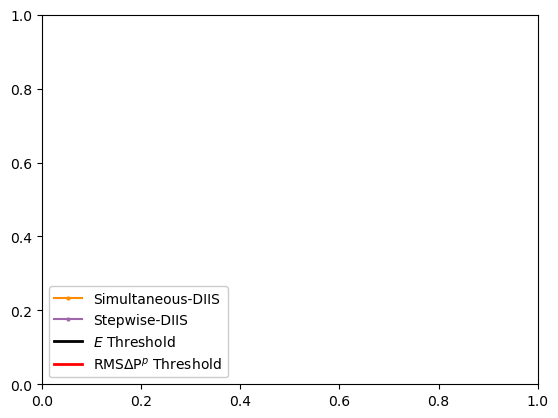

In [169]:
legend = plt.legend(lines, labels, loc=3, framealpha=1, frameon=True)

def export_legend(legend, filename="/Users/aodongliu/LiGroup/gaussian/remake_figures_new/legend_fig2.pdf", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)

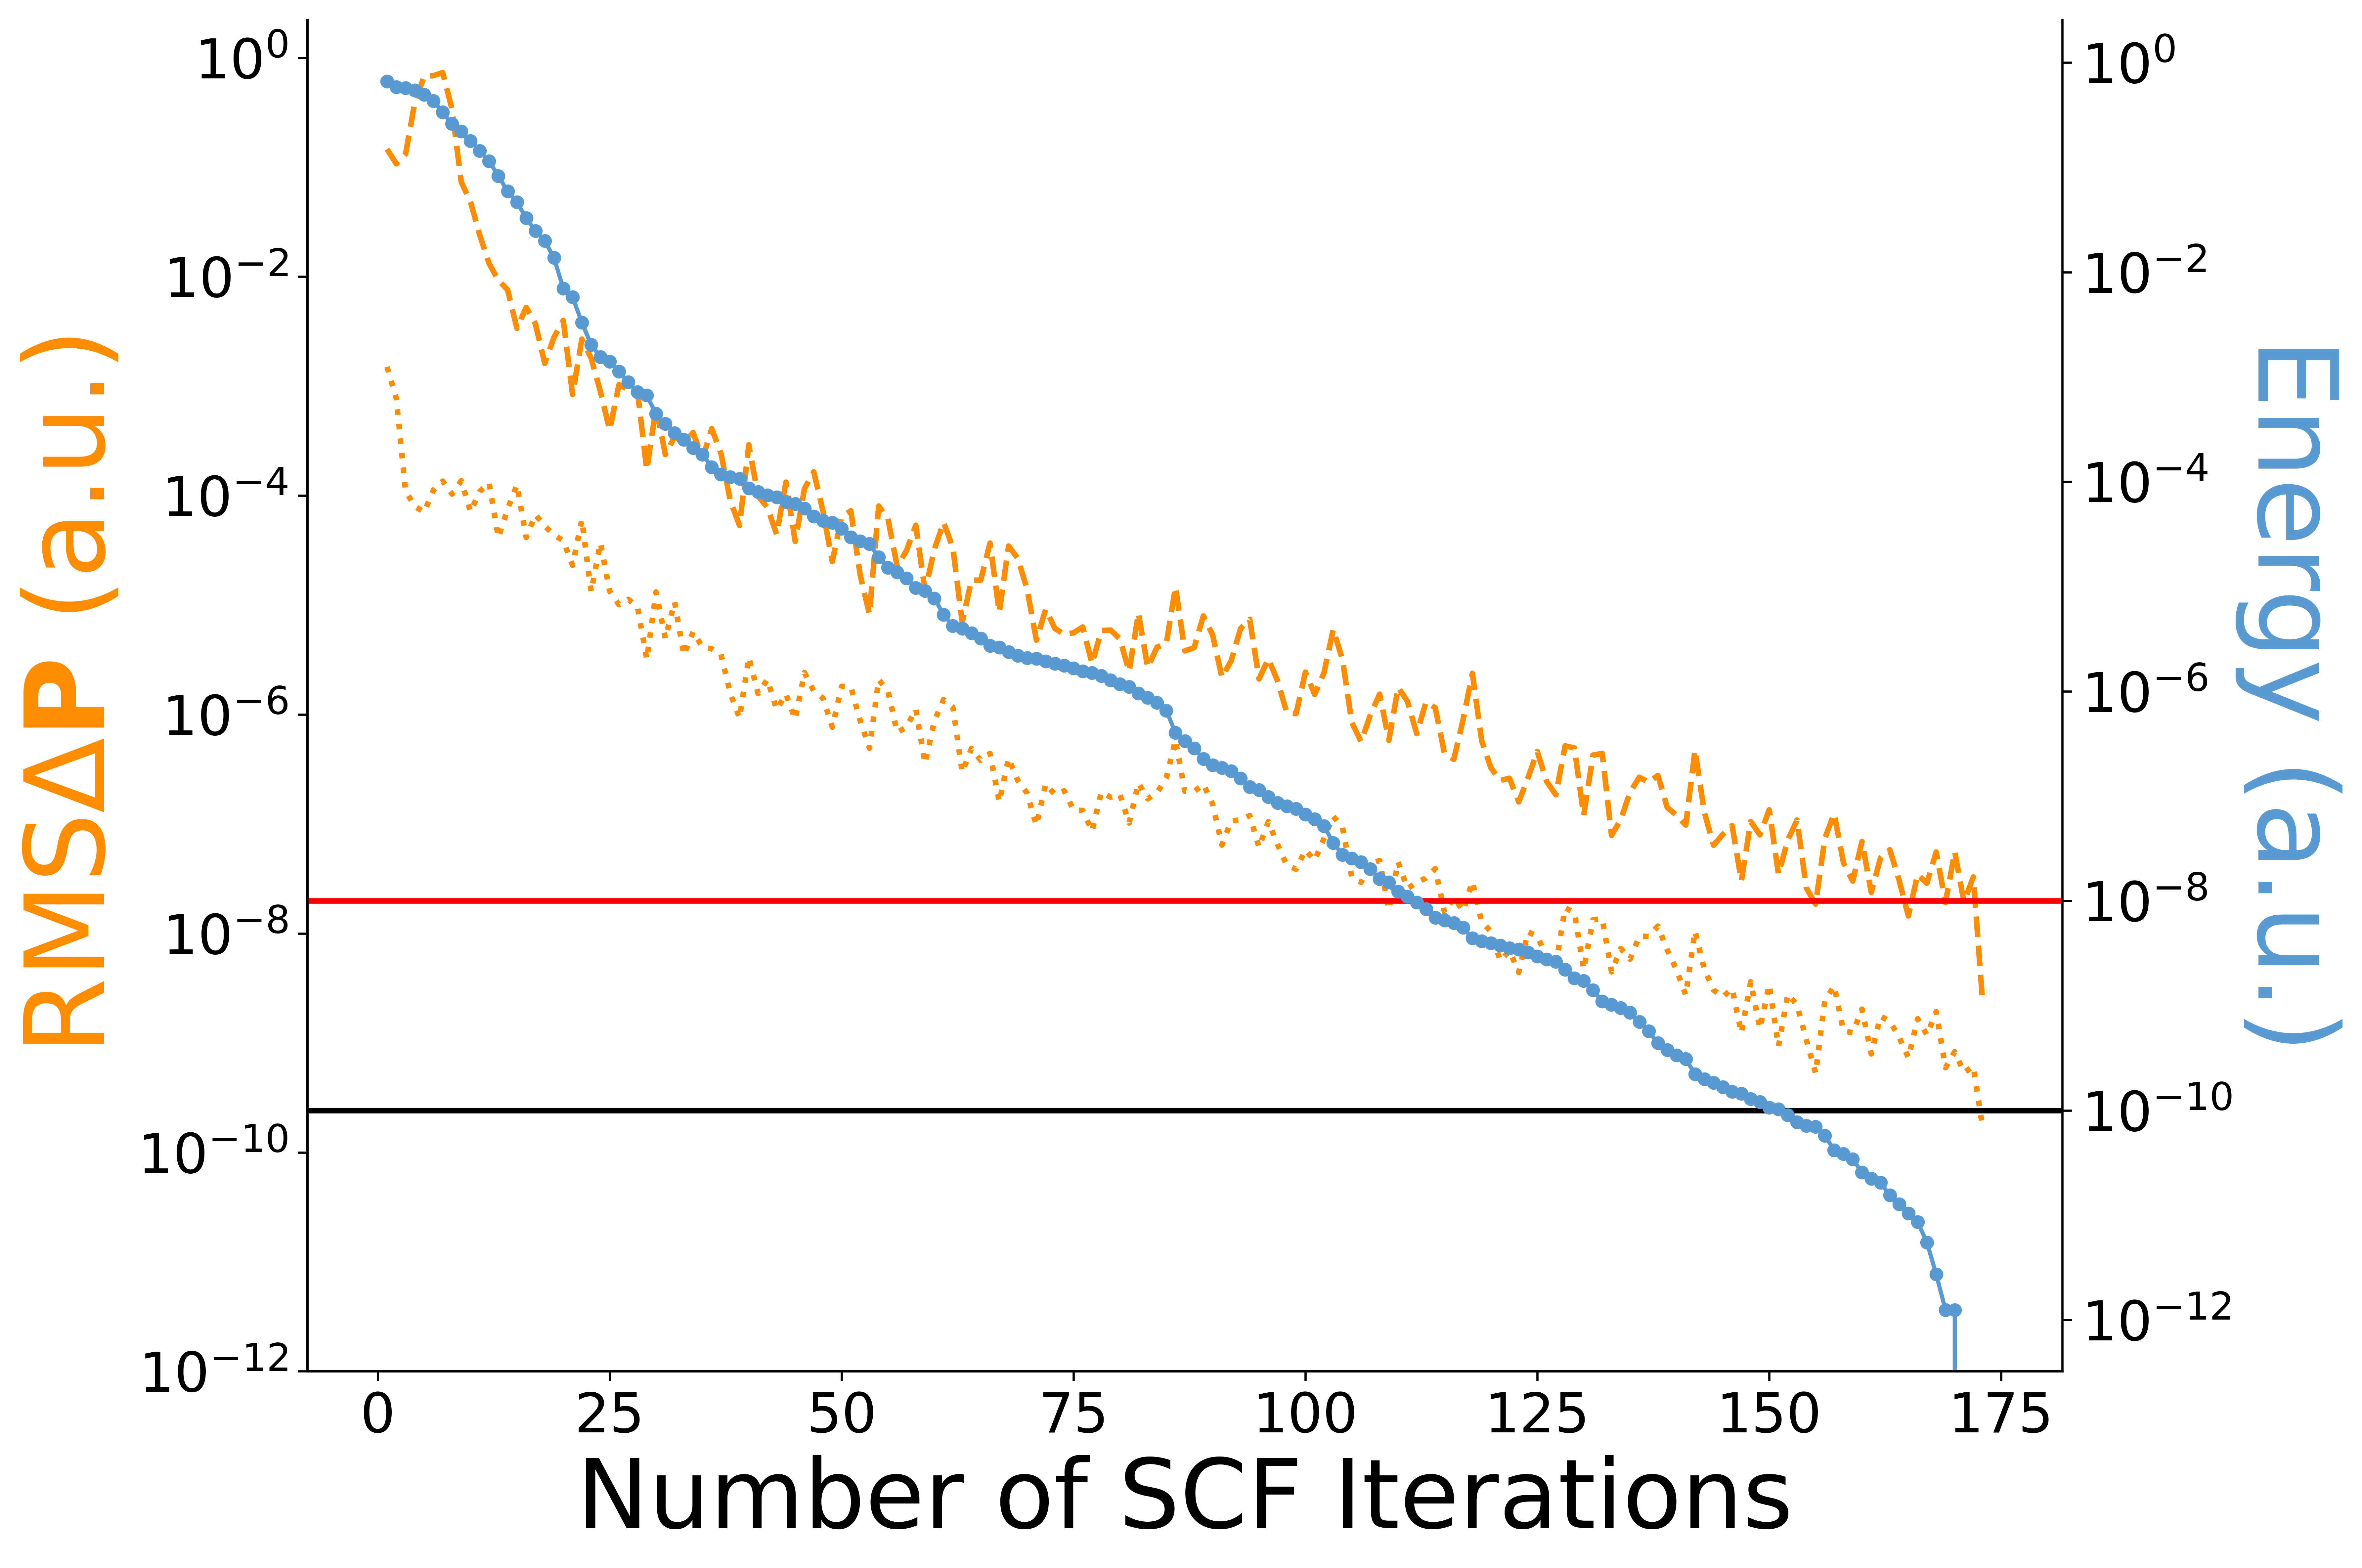

In [199]:
fig, ax1 = plt.subplots(figsize=(12,8), dpi=600)
gs = fig.add_gridspec(3, hspace=0)

ax1.plot(zundel_smt_iter,zundel_smt_pe[1:],linestyle='dotted',color='darkorange',lw=2,label="RMS$\Delta P^e$")
ax1.plot(zundel_smt_iter,zundel_smt_pp[1:],linestyle='dashed',color='darkorange',lw=2,label="RMS$\Delta P^p$")
ax1.set_yscale('log')
ax1.set_yticks(ticks = yticks)


ax2 = ax1.twinx()
ax2.plot(zundel_smt_iter,zundel_smt_e[1:],'o-',c='#599ad3',ms=4,label="Energy")
ax2.set_yscale('log')
ax2.set_yticks(ticks = yticks)

ax2.axhline(y=10**(-10),xmin=0,xmax=zundel_smt_iter.size+1,c="black",linewidth=2,zorder=0,label='$E$ Threshold')
ax2.axhline(y=10**(-8),xmin=0,xmax=zundel_smt_iter.size+1,c="red",linewidth=2,zorder=0,label='RMS$\Delta P$ Threshold')



ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

fig.set_facecolor('w')
lines_labels = [axes.get_legend_handles_labels() for axes in [ax1,ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
#fig.legend(lines, labels,fontsize=14)

ax1.set_ylabel("RMS$\Delta \mathbf{P}$ (a.u.)",fontsize=40,color='darkorange')
ax2.set_ylabel("Energy (a.u.)",fontsize=40, rotation=270, labelpad = 40,color='#599ad3')
ax1.set_xlabel("Number of SCF Iterations",fontsize=35)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('/Users/aodongliu/LiGroup/gaussian/remake_figures_new/new_figure3.pdf', dpi=3600)

In [191]:
ax1.get_yticks()

array([1.e+00, 1.e-02, 1.e-04, 1.e-06, 1.e-08, 1.e-10, 1.e-12])

In [192]:
e_yticks

[1, 0.01, 0.0001, 1e-06, 1e-08, 1e-10]

In [193]:
ytickLabels = ['1', '0.01', '0.0001', '1e-06', '1e-08', '1e-10', '1e-12']

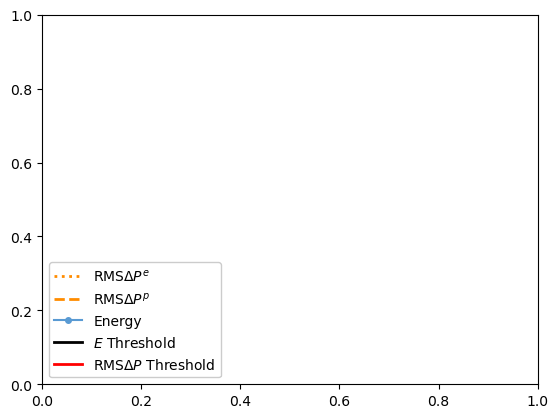

In [194]:
legend = plt.legend(lines, labels, loc=3, framealpha=1, frameon=True)

def export_legend(legend, filename="/Users/aodongliu/LiGroup/gaussian/remake_figures_new/legend_fig3.pdf", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()